In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)
import tabula
from pandasql import sqldf
import math
from scipy.stats import chi2
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ranksums
from matplotlib import pyplot as plt

In [3]:
DNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_DNAinside.xlsx", sheet_name = 'weighted')
# DNA_inside_uw = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_DNAinside.xlsx", sheet_name = 'unweighted')
RNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_RNAinside.xlsx", sheet_name = 'weighted')
# RNA_inside_uw = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_RNAinside.xlsx", sheet_name = 'unweighted')
dna_dt = DNA_inside_w.iloc[:135].copy()
rna_dt = RNA_inside_w.iloc[:133].copy()

In [4]:
shin_2015 = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\data collection\whole genome data\complete\gene expression\Shin-2015\Shin2015_wgd.xlsx')
tamang_2021 = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\data collection\whole genome data\complete\gene expression\Tamang-2021\Tamang2021_wgd.xlsx')

glyma_gene_ver = pd.read_csv(r'C:\Users\edwar\Desktop\農藝\paper2\Glyma_genes_correspondence_final.txt', delimiter = '\t')

shin_2015_6h = shin_2015[shin_2015['drought_treatment_span'] == 6].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'fc']].rename(columns = {'mapped_gene':'gene_org'})
shin_2015_12h = shin_2015[shin_2015['drought_treatment_span'] == 12].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'fc']].rename(columns = {'mapped_gene':'gene_org'})
shin_2015_24h = shin_2015[shin_2015['drought_treatment_span'] == 24].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'fc']].rename(columns = {'mapped_gene':'gene_org'})

shin_2015_6h = shin_2015_6h.merge(glyma_gene_ver, left_on = ['gene_org'], right_on = ['Wm82.a1.v1'], how = 'left').drop(['Wm82.a1.v1', 'Wm82.a1.v1.1'], axis = 1).rename(columns = {'Wm82.a2.v1':'gene'})
shin_2015_12h = shin_2015_12h.merge(glyma_gene_ver, left_on = ['gene_org'], right_on = ['Wm82.a1.v1'], how = 'left').drop(['Wm82.a1.v1', 'Wm82.a1.v1.1'], axis = 1).rename(columns = {'Wm82.a2.v1':'gene'})
shin_2015_24h = shin_2015_24h.merge(glyma_gene_ver, left_on = ['gene_org'], right_on = ['Wm82.a1.v1'], how = 'left').drop(['Wm82.a1.v1', 'Wm82.a1.v1.1'], axis = 1).rename(columns = {'Wm82.a2.v1':'gene'})

shin_2015_6h = shin_2015_6h[shin_2015_6h['gene'].isna() == False].reset_index().drop(['index'], axis = 1)
shin_2015_12h = shin_2015_12h[shin_2015_12h['gene'].isna() == False].reset_index().drop(['index'], axis = 1)
shin_2015_24h = shin_2015_24h[shin_2015_24h['gene'].isna() == False].reset_index().drop(['index'], axis = 1)

shin_2015_6h.loc[(shin_2015_6h['fc'] < 1), 'fc'] = 1 / shin_2015_6h['fc']
shin_2015_12h.loc[(shin_2015_12h['fc'] < 1), 'fc'] = 1 / shin_2015_12h['fc']
shin_2015_24h.loc[(shin_2015_24h['fc'] < 1), 'fc'] = 1 / shin_2015_24h['fc']

shin_2015_6h['p_val'] = 0.1 ** np.log2(shin_2015_6h['fc'])
shin_2015_12h['p_val'] = 0.1 ** np.log2(shin_2015_12h['fc'])
shin_2015_24h['p_val'] = 0.1 ** np.log2(shin_2015_24h['fc'])

shin_2015_6h['-logP'] = -np.log10(shin_2015_6h['p_val'])
shin_2015_12h['-logP'] = -np.log10(shin_2015_12h['p_val'])
shin_2015_24h['-logP'] = -np.log10(shin_2015_24h['p_val'])

tamang_2021_5d = tamang_2021[tamang_2021['drought_treatment_span'] == 120].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'p', 'fc']].reset_index().drop(['index'], axis = 1).rename(columns = {'mapped_gene':'gene'})
tamang_2021_7d = tamang_2021[tamang_2021['drought_treatment_span'] == 144].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'p', 'fc']].reset_index().drop(['index'], axis = 1).rename(columns = {'mapped_gene':'gene'})
tamang_2021_5d = tamang_2021_5d[tamang_2021_5d['fc'].isna() == False].reset_index().drop(['index'], axis = 1)
tamang_2021_7d = tamang_2021_7d[tamang_2021_7d['fc'].isna() == False].reset_index().drop(['index'], axis = 1)

tamang_2021_5d.loc[(tamang_2021_5d['fc'] < 1), 'fc'] = 1 / tamang_2021_5d['fc']
tamang_2021_7d.loc[(tamang_2021_7d['fc'] < 1), 'fc'] = 1 / tamang_2021_7d['fc']

tamang_2021_5d['p_val'] = 0.1 ** np.log2(tamang_2021_5d['fc'])
tamang_2021_7d['p_val'] = 0.1 ** np.log2(tamang_2021_7d['fc'])

tamang_2021_5d['-logP'] = -np.log10(tamang_2021_5d['p_val'])
tamang_2021_7d['-logP'] = -np.log10(tamang_2021_7d['p_val'])

In [10]:
val_data = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\whole genome data\complete\GWAS\Saleem-2022\saleem2022_integration_v1.xlsx")
val_data['-logP_SD'] = -np.log10(val_data['p_SD'])
val_data['-logP_LD'] = -np.log10(val_data['p_LD'])
val_data_v1 = val_data[['gene', '-logP_SD', '-logP_LD']]

In [ ]:
# dna_network.to_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\dna_merged_fv.xlsx")
# rna_network.to_excel()

In [ ]:
rna_network

In [11]:
# dna_network = pd.read_csv(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\test\dna_network.csv')
# dnapw_network = pd.read_csv(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\test\dnapw_network.csv')
# rna_network = pd.read_csv(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\test\rna_network.csv')
# rnapw_network = pd.read_csv(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\test\rnapw_network.csv')
dna_network = pd.read_csv(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\dna_merged_nw.csv')
rna_network = pd.read_csv(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\rna_merged_nw.csv')

dna_list_in = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_inside24\dna_genes_id.xlsx", sheet_name = 'inner')
dna_list_out = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_inside24\dna_genes_id.xlsx", sheet_name = 'outer')
dnapw_list_in = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_insidePW\dnapw_genes_id.xlsx", sheet_name = 'inner')
dnapw_list_out = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_insidePW\dnapw_genes_id.xlsx", sheet_name = 'outer')
rna_list_in = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_inside\rna_genes_id.xlsx", sheet_name = 'inner')
rna_list_out = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_inside\rna_genes_id.xlsx", sheet_name = 'outer')
rnapw_list_in = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_insidePW\rnapw_genes_id.xlsx", sheet_name = 'inner')
rnapw_list_out = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_insidePW\rnapw_genes_id.xlsx", sheet_name = 'outer')

dna_list = pd.concat([dna_list_in, dna_list_out]).reset_index().drop(['index'], axis = 1)
dnapw_list = pd.concat([dnapw_list_in, dnapw_list_out]).reset_index().drop(['index'], axis = 1)
rna_list = pd.concat([rna_list_in, rna_list_out]).reset_index().drop(['index'], axis = 1)
rnapw_list = pd.concat([rnapw_list_in, rnapw_list_out]).reset_index().drop(['index'], axis = 1)
gene_mapped_list = pd.concat([dna_list, dnapw_list, rna_list, rnapw_list]).reset_index().drop(['index'], axis = 1)

def transfer(cytoscape_list, gene_list):
    cytoscape_list['gene'] = cytoscape_list['name'].apply(lambda x : x.lower().capitalize())
    gene_list['gene_fv'] = gene_list['gene_id'].apply(lambda x : x.replace('_', '.').lower().capitalize())
    # inner_map['gene_fv'] = inner_map['gene_id'].apply(lambda x : x.replace('_', '.').lower().capitalize())
    # outer_map['gene_fv'] = outer_map['gene_id'].apply(lambda x : x.replace('_', '.').lower().capitalize())
    # gene_inner = cytoscape_list[cytoscape_list['selected'] == True].reset_index().drop(['index'], axis = 1)
    # gene_outer = cytoscape_list[(cytoscape_list['gene'].isin(gene_inner['gene']) == False) & (cytoscape_list['degree.layout'] != 0)].reset_index().drop(['index'], axis = 1)
    gene_all = cytoscape_list.merge(gene_list, left_on = ['shared name'], right_on = ['gene_name'], how = 'left').drop(['gene_name', 'gene_id'], axis = 1)
    # gene_inner = gene_inner.merge(inner_map, left_on = ['shared name'], right_on = ['gene_name'], how = 'left').drop(['gene_name', 'gene_id'], axis = 1)
    # gene_outer = gene_outer.merge(outer_map, left_on = ['shared name'], right_on = ['gene_name'], how = 'left').drop(['gene_name', 'gene_id'], axis = 1)
    gene_all.loc[(gene_all['gene_fv'].isna()), 'gene_fv'] = gene_all['gene']
    # gene_inner.loc[(gene_inner['gene_fv'].isna()), 'gene_fv'] = gene_inner['gene']
    # gene_outer.loc[(gene_outer['gene_fv'].isna()), 'gene_fv'] = gene_outer['gene']
    return gene_all

# dna_network = transfer(dna_network, dna_list)
# dnapw_network = transfer(dnapw_network, dnapw_list)
# rna_network = transfer(rna_network, rna_list)
# rnapw_network = transfer(rnapw_network, rnapw_list)
dna_network = transfer(dna_network, gene_mapped_list)
rna_network = transfer(rna_network, gene_mapped_list)

def inner_dt(df_nw, dtgenes_df):
    df_inner = df_nw[df_nw['selected'] == True].reset_index().drop(['index'], axis = 1)
    df_inner_dt = list(set(df_inner['gene_fv']) & set(dtgenes_df['gene']))
    return df_inner_dt

dna_inner_dt = inner_dt(dna_network, dna_dt)
# dnapw_inner_dt = inner_dt(dnapw_network, dna_dt)
rna_inner_dt = inner_dt(rna_network, rna_dt)
# rnapw_inner_dt = inner_dt(rnapw_network, rna_dt)
# print('number of DTgenes: dna inner dt {}, dna pw inner dt {}, rna inner dt {}, and rna pw inner dt {}'.format(len(dna_inner_dt), len(dnapw_inner_dt), len(rna_inner_dt), len(rnapw_inner_dt)))
print('number of DTgenes: dna inner dt {}, rna inner dt {}'.format(len(dna_inner_dt), len(rna_inner_dt)))

# dna_dtgenes = list(set(dna_inner_dt) | set(dnapw_inner_dt))
# rna_dtgenes = list(set(rna_inner_dt) | set(rnapw_inner_dt))
# print('total dtgenes in DNA sect {} and RNA sect {}'.format(len(dna_dtgenes), len(rna_dtgenes)))

# union_dtgenes = list(set(dna_dtgenes) | set(rna_dtgenes))
union_dtgenes = list(set(dna_inner_dt) | set(rna_inner_dt))
print('number of union genes: {}'.format(len(union_dtgenes)))

# overlap_dtgenes = list(set(dna_dtgenes) & set(rna_dtgenes))
overlap_dtgenes = list(set(dna_inner_dt) & set(rna_inner_dt))
print('number of overlapped genes: {}'.format(len(overlap_dtgenes)))

# steps before Validation
# DTgenes list generation
def genes_classification(df_nw, dtgenes_df):
    df_alldt = list(set(df_nw[df_nw['degree.layout'] != 0]['gene_fv']) & set(dtgenes_df['gene']))
    df_outerdt = list(set(df_nw[(df_nw['selected'] == False) & (df_nw['degree.layout'] > 0)]['gene_fv']) & set(dtgenes_df['gene']))
    df_inter = list(set(df_nw['gene_fv']) - set(dtgenes_df['gene']))
    return df_alldt, df_outerdt, df_inter

dna_alldt, dna_outerdt, dna_inter = genes_classification(df_nw = dna_network, dtgenes_df = dna_dt)
# dnapw_alldt, dnapw_outerdt, dnapw_inter = genes_classification(df_nw = dnapw_network, dtgenes_df = dna_dt)
rna_alldt, rna_outerdt, rna_inter = genes_classification(df_nw = rna_network, dtgenes_df = rna_dt)
# rnapw_alldt, rnapw_outerdt, rnapw_inter = genes_classification(df_nw = rnapw_network, dtgenes_df = rna_dt)

# integration of genes of 4 networks
# key_genes = union_dtgenes # can switch to overlapped DTgenes

# dna_all_dtgenes = list(set(dna_alldt) | set(dnapw_alldt))
# rna_all_dtgenes = list(set(rna_alldt) | set(rnapw_alldt))
# all_nw_dtgenes = list(set(dna_all_dtgenes) | set(rna_all_dtgenes))

# dna_outer_dtgenes = list(set(dna_outerdt) | set(dnapw_outerdt))
# rna_outer_dtgenes = list(set(rna_outerdt) | set(rnapw_outerdt))
# outer_nw_dtgenes = list(set(dna_outer_dtgenes) | set(rna_outer_dtgenes))
outer_nw_dtgenes = list(set(dna_outerdt) | set(rna_outerdt))

# dna_inter_genes = list(set(dna_inter) | set(dnapw_inter))
# rna_inter_genes = list(set(rna_inter) | set(rnapw_inter))
# inter_genes = list(set(dna_inter_genes) | set(rna_inter_genes))
inter_genes = list(set(dna_inter) | set(rna_inter))

key_genes = overlap_dtgenes # can switch to Union DTgenes

# dna_all_dtgenes = list(set(dna_alldt) & set(dnapw_alldt))
# rna_all_dtgenes = list(set(rna_alldt) & set(rnapw_alldt))
# all_nw_dtgenes = list(set(dna_all_dtgenes) & set(rna_all_dtgenes))
all_nw_dtgenes = list(set(dna_alldt) & set(rna_alldt))

# dna_outer_dtgenes = list(set(dna_outerdt) & set(dnapw_outerdt))
# rna_outer_dtgenes = list(set(rna_outerdt) & set(rnapw_outerdt))
# outer_nw_dtgenes = list(set(dna_outer_dtgenes) & set(rna_outer_dtgenes))

# dna_inter_genes = list(set(dna_inter) & set(dnapw_inter))
# rna_inter_genes = list(set(rna_inter) & set(rnapw_inter))
# inter_genes = list(set(dna_inter_genes) & set(rna_inter_genes))

# print('Number of genes in DNA_nw {}, RNA_nw {}, DNA outer genes {}, RNA outer genes {}, DNA intermediate genes {}, RNA intermediate genes {}',.format(len()))
print('Number of all dtgenes in nw {}, outer dtgenes {}, and intermediate genes {}'.format(len(all_nw_dtgenes), len(outer_nw_dtgenes), len(inter_genes)))

number of DTgenes: dna inner dt 52, rna inner dt 65
number of union genes: 91
number of overlapped genes: 26
Number of all dtgenes in nw 49, outer dtgenes 47, and intermediate genes 53


In [12]:
dna_keygene = dna_dt[dna_dt['gene'].isin(key_genes)].reset_index()
rna_keygene = rna_dt[rna_dt['gene'].isin(key_genes)].reset_index()
print(len(dna_keygene), len(rna_keygene))

26 26


In [16]:
dna_keygene_v1 = dna_keygene[dna_keygene['weight'] > 1.5].reset_index().drop(['level_0'], axis = 1)
print(len(dna_keygene_v1))

22


In [8]:
dna_keygene_v2 = dna_keygene_v1[(dna_keygene_v1['score_dna'] > 2) & (dna_keygene_v1['score_rna'] > 2)].reset_index().drop(['level_0'], axis = 1)
print(len(dna_keygene_v2))

11


In [22]:
# key_genes = list(dna_keygene_v2['gene'])
key_genes_df = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\key_genes_inf.csv")
key_genes = list(key_genes_df['gene'])

In [13]:
# # key genes list
# kg = pd.DataFrame()
# kg['key_genes'] = key_genes
# kg.to_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\final_DTgenes.xlsx', index = False)

In [24]:
# 6h
p_union_all_dt6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'], shin_2015_6h[shin_2015_6h['gene'].isin(all_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_outer_dt6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'], shin_2015_6h[shin_2015_6h['gene'].isin(outer_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_inter_dt6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'], shin_2015_6h[shin_2015_6h['gene'].isin(inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_remaining6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'], shin_2015_6h['-logP'], alternative = 'greater')[1]
print('6h p-value of union genes compared with all DTgenes in nw {}, outer DTgenes {}, intermediate genes {}, and remaining genes {} \n'.format(p_union_all_dt6h, p_union_outer_dt6h, p_union_inter_dt6h, p_union_remaining6h))

# 12h
p_union_all_dt12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'], shin_2015_12h[shin_2015_12h['gene'].isin(all_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_outer_dt12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'], shin_2015_12h[shin_2015_12h['gene'].isin(outer_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_inter_dt12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'], shin_2015_12h[shin_2015_12h['gene'].isin(inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_remaining12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'], shin_2015_12h['-logP'], alternative = 'greater')[1]
print('12h p-value of union genes compared with all DTgenes in nw {}, outer DTgenes {}, intermediate genes {}, and remaining genes {} \n'.format(p_union_all_dt12h, p_union_outer_dt12h, p_union_inter_dt12h, p_union_remaining12h))

# 24h
p_union_all_dt24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'], shin_2015_24h[shin_2015_24h['gene'].isin(all_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_outer_dt24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'], shin_2015_24h[shin_2015_24h['gene'].isin(outer_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_inter_dt24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'], shin_2015_24h[shin_2015_24h['gene'].isin(inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_remaining24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'], shin_2015_24h['-logP'], alternative = 'greater')[1]
print('24h p-value of union genes compared with all DTgenes in nw {}, outer DTgenes {}, intermediate genes {}, and remaining genes {} \n'.format(p_union_all_dt24h, p_union_outer_dt24h, p_union_inter_dt24h, p_union_remaining24h))

# 5d
p_union_all_dt5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'], tamang_2021_5d[tamang_2021_5d['gene'].isin(all_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_outer_dt5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'], tamang_2021_5d[tamang_2021_5d['gene'].isin(outer_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_inter_dt5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'], tamang_2021_5d[tamang_2021_5d['gene'].isin(inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_remaining5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'], tamang_2021_5d['-logP'], alternative = 'greater')[1]
print('5d p-value of union genes compared with all DTgenes in nw {}, outer DTgenes {}, intermediate genes {}, and remaining genes {} \n'.format(p_union_all_dt5d, p_union_outer_dt5d, p_union_inter_dt5d, p_union_remaining5d))

# 7d
p_union_all_dt7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'], tamang_2021_7d[tamang_2021_7d['gene'].isin(all_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_outer_dt7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'], tamang_2021_7d[tamang_2021_7d['gene'].isin(outer_nw_dtgenes)]['-logP'], alternative = 'greater')[1]
p_union_inter_dt7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'], tamang_2021_7d[tamang_2021_7d['gene'].isin(inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_remaining7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'], tamang_2021_7d['-logP'], alternative = 'greater')[1]
print('7d p-value of union genes compared with all DTgenes in nw {}, outer DTgenes {}, intermediate genes {}, and remaining genes {} \n'.format(p_union_all_dt7d, p_union_outer_dt7d, p_union_inter_dt7d, p_union_remaining7d))

# 3~4 wks
p_union_all_dt4w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_SD'], val_data[val_data['gene'].isin(all_nw_dtgenes)]['-logP_SD'], alternative = 'greater')[1]
p_union_outer_dt4w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_SD'], val_data[val_data['gene'].isin(outer_nw_dtgenes)]['-logP_SD'], alternative = 'greater')[1]
p_union_inter_dt4w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_SD'], val_data[val_data['gene'].isin(inter_genes)]['-logP_SD'], alternative = 'greater')[1]
p_union_remaining_dt4w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_SD'], val_data['-logP_SD'], alternative = 'greater')[1]
print('3~4 wks p-value of union genes compared with all DTgenes in nw {}, outer DTgenes {}, intermediate genes {}, and remaining genes {} \n'.format(p_union_all_dt4w, p_union_outer_dt4w, p_union_inter_dt4w, p_union_remaining_dt4w))

# 6~7 wks
p_union_all_dt7w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_LD'], val_data[val_data['gene'].isin(all_nw_dtgenes)]['-logP_LD'], alternative = 'greater')[1]
p_union_outer_dt7w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_LD'], val_data[val_data['gene'].isin(outer_nw_dtgenes)]['-logP_LD'], alternative = 'greater')[1]
p_union_inter_dt7w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_LD'], val_data[val_data['gene'].isin(inter_genes)]['-logP_LD'], alternative = 'greater')[1]
p_union_remaining_dt7w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_LD'], val_data['-logP_LD'], alternative = 'greater')[1]
print('6~7 wks p-value of union genes compared with all DTgenes in nw {}, outer DTgenes {}, intermediate genes {}, and remaining genes {}'.format(p_union_all_dt7w, p_union_outer_dt7w, p_union_inter_dt7w, p_union_remaining_dt7w))

6h p-value of union genes compared with all DTgenes in nw 0.17714236173753095, outer DTgenes 0.017195022111785113, intermediate genes 0.0011251132840428954, and remaining genes 1.7201961333412e-05 

12h p-value of union genes compared with all DTgenes in nw 0.12663362944996825, outer DTgenes 0.0053908421909137135, intermediate genes 0.0007776579149194415, and remaining genes 5.123383147160903e-06 

24h p-value of union genes compared with all DTgenes in nw 0.14690081011873363, outer DTgenes 0.015822331572045795, intermediate genes 0.004139965718885705, and remaining genes 0.00014810673977309996 

5d p-value of union genes compared with all DTgenes in nw 0.23351808820786302, outer DTgenes 0.060259433263312616, intermediate genes 7.94940545304581e-05, and remaining genes 0.0002788036049297682 

7d p-value of union genes compared with all DTgenes in nw 0.6861168605490184, outer DTgenes 0.44991090880626344, intermediate genes 0.04267551949924828, and remaining genes 0.04885952066672699 

3

calculate mean -logP of each term

In [26]:
# key genes in respective validation database
mean_keygenes_fv6h = shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'].mean()
mean_keygenes_fv12h = shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'].mean()
mean_keygenes_fv24h = shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'].mean()
mean_keygenes_fv5d = tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'].mean()
mean_keygenes_fv7d = tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'].mean()
mean_keygenes_fv4w = val_data[val_data['gene'].isin(key_genes)]['-logP_SD'].mean()
mean_keygenes_fv6w = val_data[val_data['gene'].isin(key_genes)]['-logP_LD'].mean()
print('average -logP of key genes: 6h {}, 12h {}, 24h {}, 5d {}, 7d {}, 4wks {}, and 6 wks {}'.format(mean_keygenes_fv6h, mean_keygenes_fv12h, mean_keygenes_fv24h, mean_keygenes_fv5d, mean_keygenes_fv7d, mean_keygenes_fv4w, mean_keygenes_fv6w))

average -logP of key genes: 6h 2.9920382006069794, 12h 3.588424055375363, 24h 4.4354610350942085, 5d 2.657143886783933, 7d 2.3213788221429703, 4wks 3.4316407669349176, and 6 wks 3.699180420963244


In [28]:
# outer genes in respective validation database
mean_outerdt_6h = shin_2015_6h[shin_2015_6h['gene'].isin(outer_nw_dtgenes)]['-logP'].mean()
mean_outerdt_12h = shin_2015_12h[shin_2015_12h['gene'].isin(outer_nw_dtgenes)]['-logP'].mean()
mean_outerdt_24h = shin_2015_24h[shin_2015_24h['gene'].isin(outer_nw_dtgenes)]['-logP'].mean()
mean_outerdt_5d = tamang_2021_5d[tamang_2021_5d['gene'].isin(outer_nw_dtgenes)]['-logP'].mean()
mean_outerdt_7d = tamang_2021_7d[tamang_2021_7d['gene'].isin(outer_nw_dtgenes)]['-logP'].mean()
mean_outerdt_4w = val_data[val_data['gene'].isin(outer_nw_dtgenes)]['-logP_SD'].mean()
mean_outerdt_6w = val_data[val_data['gene'].isin(outer_nw_dtgenes)]['-logP_LD'].mean()
print('average -logP of outer DT genes (Union): 6h {}, 12h {}, 24h {}, 5d {}, 7d {}, 4wks {}, and 6 wks {}'.format(mean_outerdt_6h, mean_outerdt_12h, mean_outerdt_24h, mean_outerdt_5d, mean_outerdt_7d, mean_outerdt_4w, mean_outerdt_6w))

average -logP of outer DT genes (Union): 6h 1.7198757947789856, 12h 1.891305070713601, 24h 2.4135990229028117, 5d 1.5118413362950427, 7d 1.5428148831769566, 4wks 3.3284008431517194, and 6 wks 3.101673073605115


In [30]:
# intermediate genes in respective validation database
mean_inter_6h = shin_2015_6h[shin_2015_6h['gene'].isin(inter_genes)]['-logP'].mean()
mean_inter_12h = shin_2015_12h[shin_2015_12h['gene'].isin(inter_genes)]['-logP'].mean()
mean_inter_24h = shin_2015_24h[shin_2015_24h['gene'].isin(inter_genes)]['-logP'].mean()
mean_inter_5d = tamang_2021_5d[tamang_2021_5d['gene'].isin(inter_genes)]['-logP'].mean()
mean_inter_7d = tamang_2021_7d[tamang_2021_7d['gene'].isin(inter_genes)]['-logP'].mean()
mean_inter_4w = val_data[val_data['gene'].isin(inter_genes)]['-logP_SD'].mean()
mean_inter_6w = val_data[val_data['gene'].isin(inter_genes)]['-logP_LD'].mean()
print('average -logP of intermediate genes (Union): 6h {}, 12h {}, 24h {}, 5d {}, 7d {}, 4wks {}, and 6 wks {}'.format(mean_inter_6h, mean_inter_12h, mean_inter_24h, mean_inter_5d, mean_inter_7d, mean_inter_4w, mean_inter_6w))

average -logP of intermediate genes (Union): 6h 1.2717439011023512, 12h 1.5041077458008618, 24h 1.8324952129589378, 5d 0.8007385549845382, 7d 0.7549151916648859, 4wks 2.5207350666864774, and 6 wks 2.3086833377087164


In [32]:
# remaining genes
mean_remaining_6h = shin_2015_6h['-logP'].mean()
mean_remaining_12h = shin_2015_12h['-logP'].mean()
mean_remaining_24h = shin_2015_24h['-logP'].mean()
mean_remaining_5d = tamang_2021_5d['-logP'].mean()
mean_remaining_7d = tamang_2021_7d['-logP'].mean()
mean_remaining_4w = val_data['-logP_SD'].mean()
mean_remaining_6w = val_data['-logP_LD'].mean()
print('average -logP of remaining genes (Union): 6h {}, 12h {}, 24h {}, 5d {}, 7d {}, 4wks {}, and 6 wks {}'.format(mean_remaining_6h, mean_remaining_12h, mean_remaining_24h, mean_remaining_5d, mean_remaining_7d, mean_remaining_4w, mean_remaining_6w))

average -logP of remaining genes (Union): 6h 0.8390229218062781, 12h 0.8779076652419087, 24h 1.2670046118900677, 5d 0.8872135816608748, 7d 0.9790978040891529, 4wks 2.564855098493311, and 6 wks 2.584136111094527


In [34]:
# errors of key genes
errors_keygene_6h = shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'].std()
errors_keygene_12h = shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'].std()
errors_keygene_24h = shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'].std()
errors_keygene_5d = tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'].std()
errors_keygene_7d = tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'].std()
errors_keygene_4w = val_data[val_data['gene'].isin(key_genes)]['-logP_SD'].std()
errors_keygene_6w = val_data[val_data['gene'].isin(key_genes)]['-logP_LD'].std()
print('errors of key genes: 6h {}, 12h {}, 24h {}, 5d {}, 7d {}, 4wks {}, and 6 wks {}'.format(errors_keygene_6h, errors_keygene_12h, errors_keygene_24h, errors_keygene_5d, errors_keygene_7d, errors_keygene_4w, errors_keygene_6w))

errors of key genes: 6h 1.7342564186492317, 12h 2.110837798565353, 24h 2.8538362943086755, 5d 2.5191860733337275, 7d 2.860538644807657, 4wks 1.9337203097745572, and 6 wks 2.1619116932159805


In [36]:
# errors of outer genes
errors_outerdt_6h = shin_2015_6h[shin_2015_6h['gene'].isin(outer_nw_dtgenes)]['-logP'].std()
errors_outerdt_12h = shin_2015_12h[shin_2015_12h['gene'].isin(outer_nw_dtgenes)]['-logP'].std()
errors_outerdt_24h = shin_2015_24h[shin_2015_24h['gene'].isin(outer_nw_dtgenes)]['-logP'].std()
errors_outerdt_5d = tamang_2021_5d[tamang_2021_5d['gene'].isin(outer_nw_dtgenes)]['-logP'].std()
errors_outerdt_7d = tamang_2021_7d[tamang_2021_7d['gene'].isin(outer_nw_dtgenes)]['-logP'].std()
errors_outerdt_4w = val_data[val_data['gene'].isin(outer_nw_dtgenes)]['-logP_SD'].std()
errors_outerdt_6w = val_data[val_data['gene'].isin(outer_nw_dtgenes)]['-logP_LD'].std()
print('errors of outer DTgenes: 6h {}, 12h {}, 24h {}, 5d {}, 7d {}, 4wks {}, and 6 wks {}'.format(errors_outerdt_6h, errors_outerdt_12h, errors_outerdt_24h, errors_outerdt_5d, errors_outerdt_7d, errors_outerdt_4w, errors_outerdt_6w))

errors of outer DTgenes: 6h 1.4510103808586639, 12h 1.5206446485399958, 24h 1.9901685302516454, 5d 1.4395549736995392, 7d 1.2475221744662606, 4wks 1.928378428862596, and 6 wks 1.59952062243735


In [38]:
# errors of intermediate genes
errors_inter_6h = shin_2015_6h[shin_2015_6h['gene'].isin(inter_genes)]['-logP'].std()
errors_inter_12h = shin_2015_12h[shin_2015_12h['gene'].isin(inter_genes)]['-logP'].std()
errors_inter_24h = shin_2015_24h[shin_2015_24h['gene'].isin(inter_genes)]['-logP'].std()
errors_inter_5d = tamang_2021_5d[tamang_2021_5d['gene'].isin(inter_genes)]['-logP'].std()
errors_inter_7d = tamang_2021_7d[tamang_2021_7d['gene'].isin(inter_genes)]['-logP'].std()
errors_inter_4w = val_data[val_data['gene'].isin(inter_genes)]['-logP_SD'].std()
errors_inter_6w = val_data[val_data['gene'].isin(inter_genes)]['-logP_LD'].std()
print('errors of intermediate genes: 6h {}, 12h {}, 24h {}, 5d {}, 7d {}, 4wks {}, and 6 wks {}'.format(errors_inter_6h, errors_inter_12h, errors_inter_24h, errors_inter_5d, errors_inter_7d, errors_inter_4w, errors_inter_6w))

errors of intermediate genes: 6h 1.298474811845936, 12h 1.5529663346580267, 24h 1.8077564898028022, 5d 1.083336613220922, 7d 0.9184008067975539, 4wks 1.393857040859301, and 6 wks 1.4471629469737695


In [40]:
# errors of remaining genes
errors_remaining_6h = shin_2015_6h['-logP'].std()
errors_remaining_12h = shin_2015_12h['-logP'].std()
errors_remaining_24h = shin_2015_24h['-logP'].std()
errors_remaining_5d = tamang_2021_5d['-logP'].std()
errors_remaining_7d = tamang_2021_7d['-logP'].std()
errors_remaining_4w = val_data['-logP_SD'].std()
errors_remaining_6w = val_data['-logP_LD'].std()
print('errors of remaining genes: 6h {}, 12h {}, 24h {}, 5d {}, 7d {}, 4wks {}, and 6 wks {}'.format(errors_remaining_6h, errors_remaining_12h, errors_remaining_24h, errors_remaining_5d, errors_remaining_7d, errors_remaining_4w, errors_remaining_6w))

errors of remaining genes: 6h 1.0821319599641288, 12h 1.174049251979955, 24h 1.5590984522654672, 5d 1.0889171403983446, 7d 1.1663149082325612, 4wks 1.6805151781666707, and 6 wks 1.677380914657327


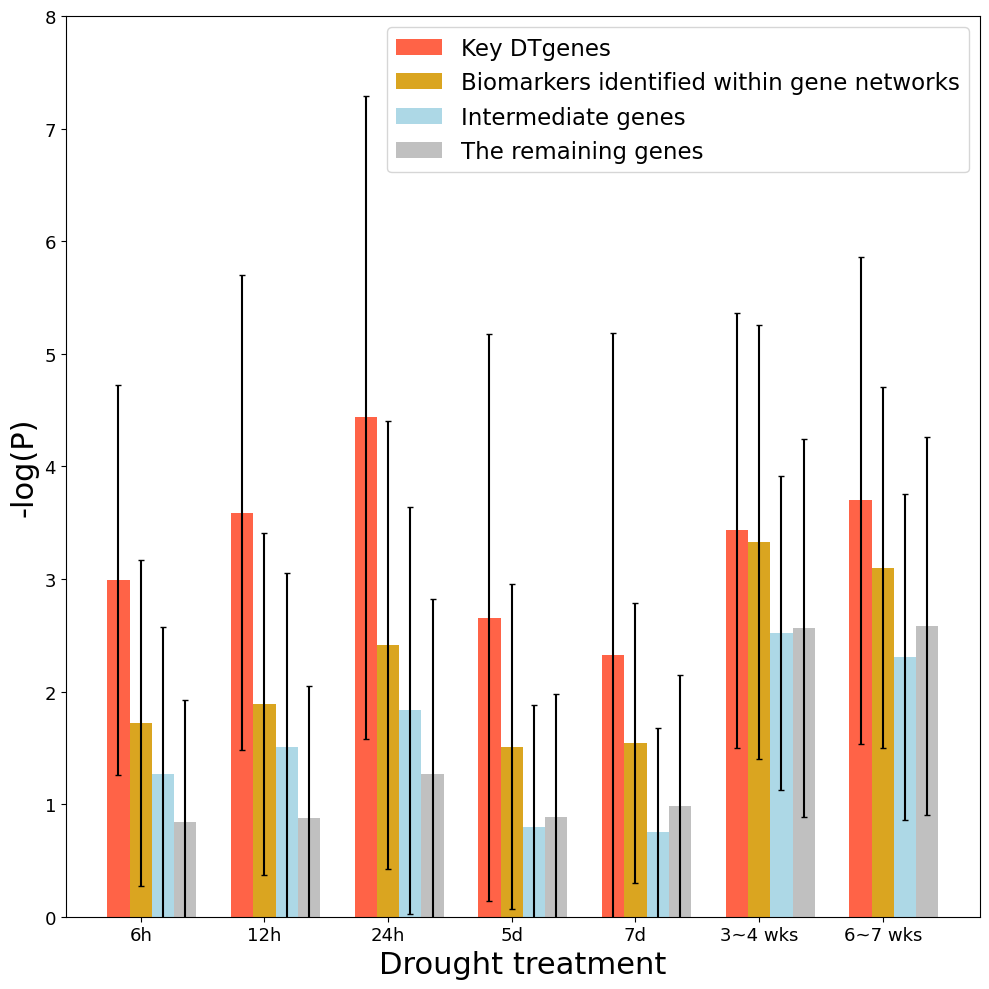

In [56]:
# Data for key genes
data_keygenes = [mean_keygenes_fv6h, mean_keygenes_fv12h, mean_keygenes_fv24h, mean_keygenes_fv5d, mean_keygenes_fv7d, 
                 mean_keygenes_fv4w, mean_keygenes_fv6w]
errors_keygenes = [errors_keygene_6h, errors_keygene_12h, errors_keygene_24h, errors_keygene_5d, errors_keygene_7d, 
                   errors_keygene_4w, errors_keygene_6w]

# Data for outer DTgenes
data_outerdt = [mean_outerdt_6h, mean_outerdt_12h, mean_outerdt_24h, mean_outerdt_5d, mean_outerdt_7d, mean_outerdt_4w, mean_outerdt_6w]
errors_outerdt = [errors_outerdt_6h, errors_outerdt_12h, errors_outerdt_24h, errors_outerdt_5d, errors_outerdt_7d, errors_outerdt_4w, errors_outerdt_6w]

# Data for intermediate genes
data_inter = [mean_inter_6h, mean_inter_12h, mean_inter_24h, mean_inter_5d, mean_inter_7d, mean_inter_4w, mean_inter_6w]
errors_inter = [errors_inter_6h, errors_inter_12h, errors_inter_24h, errors_inter_5d, errors_inter_7d, errors_inter_4w, errors_inter_6w]

# Data for remaining genes
data_remaining = [mean_remaining_6h, mean_remaining_12h, mean_remaining_24h, mean_remaining_5d, mean_remaining_7d, mean_remaining_4w, mean_remaining_6w]
errors_remaining = [errors_remaining_6h, errors_remaining_12h, errors_remaining_24h, errors_remaining_5d, errors_remaining_7d, errors_remaining_4w, errors_remaining_6w]

# set number of position (7 different treatment)
x = np.arange(len(data_keygenes))
width = 0.18
capsize_num = 2

# create figure
fig, ax = plt.subplots(figsize = (10, 10))
# fig, ax = plt.subplots(figsize = (8, 8))

# Plot key genes
rects1 = ax.bar(x, data_keygenes, width, yerr = errors_keygenes, capsize = capsize_num, label = 'Key DTgenes', color = 'tomato')

# Plot outer DTgenes
rects2 = ax.bar(x + width, data_outerdt, width, yerr = errors_outerdt, capsize = capsize_num, label = 'Biomarkers identified within gene networks', color = 'goldenrod')

# Plot intermediate genes
rects3 = ax.bar(x + width * 2, data_inter, width, yerr = errors_inter, capsize = capsize_num, label = 'Intermediate genes', color = 'lightblue')

# Plot remaining genes
rect4 = ax.bar(x + width * 3, data_remaining, width, yerr = errors_remaining, capsize = capsize_num, label = 'The remaining genes', color = 'silver')

# Set notifications near bar chart
ax.set_xlabel('Drought treatment', fontsize = 22)
ax.set_ylabel('-log(P)', fontsize = 22)
ax.set_xticks(x + width)
ax.set_ylim(bottom = 0, top = 8)
ax.set_xticklabels(['6h', '12h', '24h', '5d', '7d', '3~4 wks', '6~7 wks'], fontsize = 13)
ax.tick_params(axis='y', labelsize = 13)  # Because there's no ylabels, we set new indication to change fontsize.

ax.legend(fontsize = 16.5)

# show
plt.tight_layout()
plt.savefig(r"C:\Users\edwar\Downloads\fig8.jpg", dpi = 400, format = 'jpg', bbox_inches = 'tight')
# plt.show()

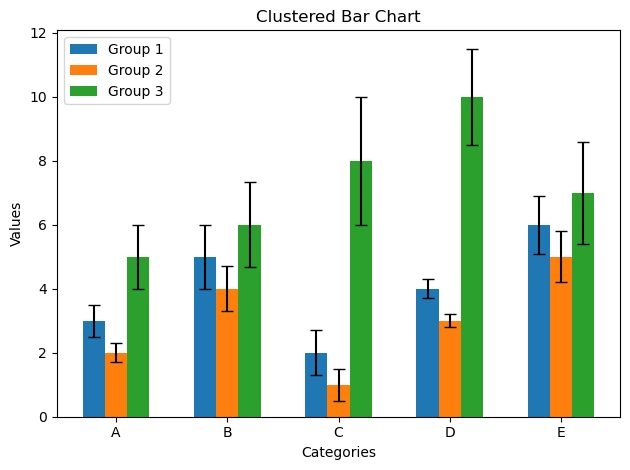

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the first group
data1 = [3, 5, 2, 4, 6]
errors1 = [0.5, 1, 0.7, 0.3, 0.9]
labels1 = ['A', 'B', 'C', 'D', 'E']


# Data for the second group
data2 = [2, 4, 1, 3, 5]
errors2 = [0.3, 0.7, 0.5, 0.2, 0.8]
labels2 = ['F', 'G', 'H', 'I', 'J']

# Data for third group
data3 = [5, 6, 8, 10, 7]
errors3 = [1, 1.333, 2, 1.5, 1.6]

# Calculate the positions for the bars in each group
x = np.arange(len(labels1))
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the first group
rects1 = ax.bar(x, data1, width, yerr=errors1, capsize=4, label='Group 1')

# Plot the second group
rects2 = ax.bar(x + width, data2, width, yerr=errors2, capsize=4, label='Group 2')

# Plot the third group
rects3 = ax.bar(x + width * 2, data3, width, yerr=errors3, capsize=4, label='Group 3')

# Set the axis labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Clustered Bar Chart')

# Set the x-axis ticks and labels
ax.set_xticks(x + width)
ax.set_xticklabels(labels1)

# Add a legend
ax.legend()

# Show the bar chart
plt.tight_layout()
plt.show()

In [6]:
l_degree_dna = np.percentile(dna_network['degree.layout'], 45)
u_degree_dna = np.percentile(dna_network['degree.layout'], 65)
dna_num = len(dna_network[(dna_network['degree.layout'] < u_degree_dna) & (dna_network['degree.layout'] > l_degree_dna)])
print(u_degree_dna, l_degree_dna, dna_num)

14.650000000000006 3.0 28


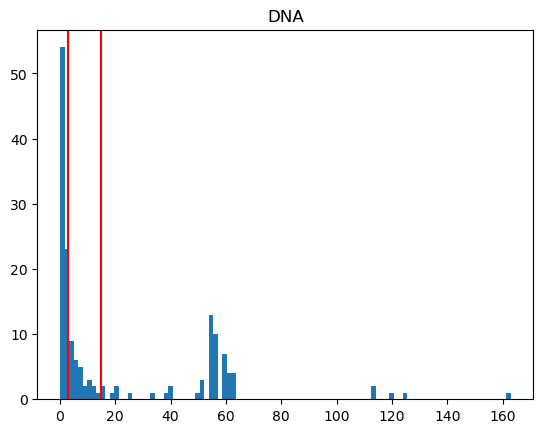

In [7]:
plt.title('DNA')
plt.hist(dna_network['degree.layout'], bins = 100)
plt.axvline(x = u_degree_dna, color = 'red')
plt.axvline(x = l_degree_dna, color = 'red')
plt.show()

In [8]:
l_degree_dnapw = np.percentile(dnapw_network['degree.layout'], 45)
u_degree_dnapw = np.percentile(dnapw_network['degree.layout'], 65)
dnapw_num = len(dnapw_network[(dnapw_network['degree.layout'] < u_degree_dnapw) & (dnapw_network['degree.layout'] > l_degree_dnapw)])
print(u_degree_dnapw, l_degree_dnapw, dnapw_num)

19.5 2.0 26


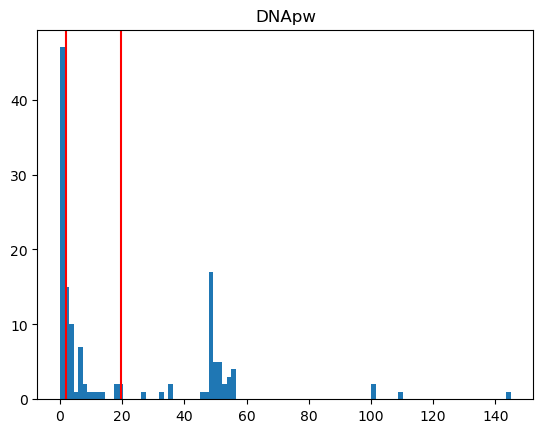

In [9]:
plt.title('DNApw')
plt.hist(dnapw_network['degree.layout'], bins = 100)
plt.axvline(x = u_degree_dnapw, color = 'red')
plt.axvline(x = l_degree_dnapw, color = 'red')
plt.show()

In [10]:
l_degree_rna = np.percentile(rna_network['degree.layout'], 45)
u_degree_rna = np.percentile(rna_network['degree.layout'], 65)
rna_num = len(rna_network[(rna_network['degree.layout'] < u_degree_rna) & (rna_network['degree.layout'] > l_degree_rna)])
print(u_degree_rna, l_degree_rna, rna_num)

12.0 2.0 28


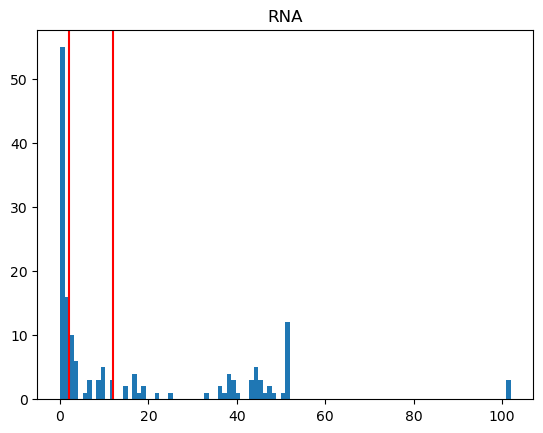

In [11]:
plt.title('RNA')
plt.hist(rna_network['degree.layout'], bins = 100)
plt.axvline(x = u_degree_rna, color = 'red')
plt.axvline(x = l_degree_rna, color = 'red')
plt.show()

In [12]:
l_degree_rnapw = np.percentile(rnapw_network['degree.layout'], 45)
u_degree_rnapw = np.percentile(rnapw_network['degree.layout'], 65)
rnapw_num = len(rnapw_network[(rnapw_network['degree.layout'] < u_degree_rnapw) & (rnapw_network['degree.layout'] > l_degree_rnapw)])
print(u_degree_rnapw, l_degree_rnapw, rnapw_num)

17.10000000000001 2.0 23


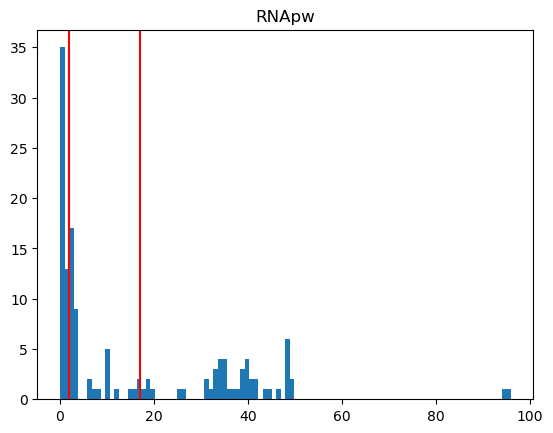

In [13]:
plt.title('RNApw')
plt.hist(rnapw_network['degree.layout'], bins = 100)
plt.axvline(x = u_degree_rnapw, color = 'red')
plt.axvline(x = l_degree_rnapw, color = 'red')
plt.show()

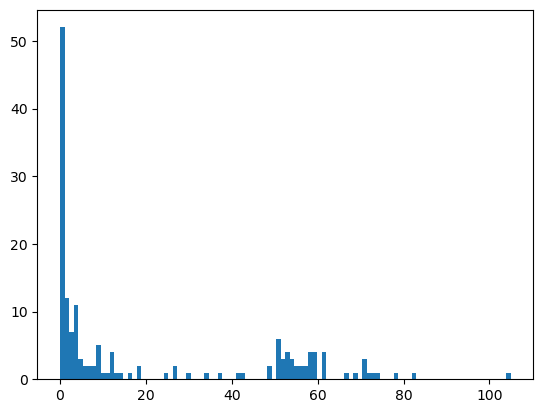

In [102]:
plt.hist(dna_merged['degree.layout'], bins = 100)
plt.show()

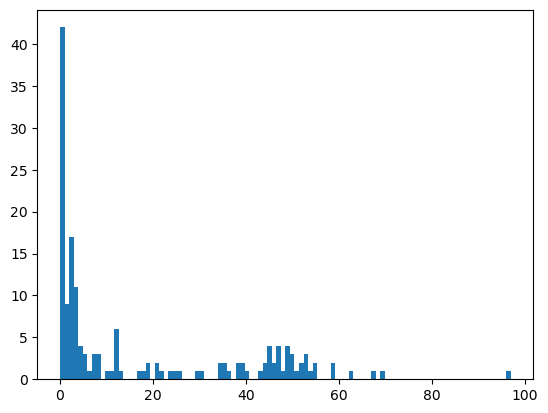

In [103]:
plt.hist(rna_merged['degree.layout'], bins = 100)
plt.show()

In [111]:
dna_merged = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\test\dna_merged_nw.csv")
len(dna_merged)

162

In [135]:
low_dna = np.percentile(dna_merged['degree.layout'], 40)
up_dna = np.percentile(dna_merged['degree.layout'], 80)
print(up_dna, low_dna)

53.0 3.0


In [113]:
rna_merged = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\test\rna_merged_nw.csv")
len(rna_merged)

160

In [136]:
low_rna = np.percentile(rna_merged['degree.layout'], 40)
up_rna = np.percentile(rna_merged['degree.layout'], 80)
print(up_rna, low_rna)

45.0 2.0


In [115]:
def dtgenes_prod(df, upper, lower,dtgenes_df):
    df['gene'] = df['shared name'].apply(lambda x : x.lower().capitalize())
    df_dt = df[(df['degree.layout'] >= lower) & (df['degree.layout'] <= upper)].reset_index().drop(['index'], axis = 1)
    dtgenes = list(set(df_dt['gene']) & set(dtgenes_df['gene']))
    return dtgenes

In [130]:
dna_dtgenes = dtgenes_prod(dna_merged, up_dna, low_dna, dna_dt)
len(dna_dtgenes)

45

In [131]:
rna_dtgenes = dtgenes_prod(rna_merged, up_rna, low_rna, rna_dt)
len(rna_dtgenes)

58

In [132]:
print('intersection of DTgenes', len(set(dna_dtgenes) & set(rna_dtgenes)))
print('Union of DTgenes', len(set(dna_dtgenes) | set(rna_dtgenes)))

intersection of DTgenes 22
Union of DTgenes 81


In [133]:
key_genes = list(set(dna_dtgenes) & set(rna_dtgenes))
# key_genes = list(set(dna_dtgenes) | set(rna_dtgenes))

KEY GENES PW discovery

In [2]:
go = pd.read_csv(r'C:\Users\edwar\Desktop\農藝\paper2\data collection\Function\GO_terms_4899.txt', delimiter = '\t')
keygenes = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\final_DTgenes.xlsx")

C:\Users\edwar\AppData\Local\Temp\ipykernel_22236\3545359930.py:1: DtypeWarning: Columns (58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,

In [4]:
keygenes_list = list(keygenes['key_genes'])

In [7]:
go_v1 = go[(go['N.genes'] > 4) & (go['N.genes'] < 1500)].reset_index().drop(['index'], axis = 1)

In [85]:
pw_ttl_list = []
for gene in keygenes_list:
    pw_list = []
    for i in range(len(go_v1['Pathway'])):
        df = pd.DataFrame(go_v1.iloc[i, 3:3 + go_v1.iloc[i, 2]]).reset_index() # 第二欄為No.genes in pw
        if df[df[i] == gene].empty == False:
            pw_list.append(go_v1.iloc[i, 1]) # column1 is pw name
    pw_ttl_list.append(pw_list)
    print('finished one DTgenes')

pw_keygene_dict = dict(zip(keygenes_list, pw_ttl_list))

finished one DTgenes
finished one DTgenes
finished one DTgenes
finished one DTgenes
finished one DTgenes
finished one DTgenes
finished one DTgenes
finished one DTgenes
finished one DTgenes
finished one DTgenes
finished one DTgenes


In [107]:
# 創建一個 df, 欄位名稱是基因，然後底下資料是個別基因的 pw
df_pw = pd.DataFrame()
df_pw['test'] = [np.nan for i in range(50)] 
for gene in keygenes_list:
    df_pw[gene] = pw_keygene_dict[gene] + [np.nan for i in range(len(df_pw['test']) - len(pw_keygene_dict[gene]))]

In [117]:
all_pw_lst = []
for gene in keygenes_list:
    all_pw_lst = all_pw_lst + pw_keygene_dict[gene]

In [132]:
from collections import Counter
counter = Counter(all_pw_lst)
sorted(counter.items(), key = lambda x : x[1], reverse = True)[:40]

[('apoplast', 7),
 ('cell wall', 4),
 ('response to high light intensity', 4),
 ('glycolysis', 4),
 ('rRNA processing', 4),
 ('chloroplast stroma', 4),
 ('plastid organization', 4),
 ('chloroplast envelope', 4),
 ('photosystem II assembly', 4),
 ('protein folding', 3),
 ('response to heat', 3),
 ('response to hydrogen peroxide', 3),
 ('pentose-phosphate shunt', 3),
 ('unsaturated fatty acid biosynthetic process', 3),
 ('PSII associated light-harvesting complex II catabolic process', 3),
 ('chlorophyll biosynthetic process', 3),
 ('isopentenyl diphosphate biosynthetic process, mevalonate-independent pathway',
  3),
 ('cysteine biosynthetic process', 3),
 ('response to cadmium ion', 3),
 ('hydrolase activity, hydrolyzing O-glycosyl compounds', 2),
 ('carbohydrate metabolic process', 2),
 ('plant-type cell wall', 2),
 ('endopeptidase inhibitor activity', 2),
 ('response to nitrate', 2),
 ('nitrate transport', 2),
 ('response to endoplasmic reticulum stress', 2),
 ('glucose metabolic proce

In [68]:
i = 3
df = pd.DataFrame(go_v1.iloc[i, 3:3 + go_v1.iloc[i, 2]]).reset_index()
pw_list = []
if df[df[i] == gene].empty == False:
    pw_list.append(go_v1.iloc[i, 1])

In [82]:
t = [2, 1]

ee = []
ee.append(t)

t1 = [3, 3]
ee.append(t1)

g = ['g1', 'g2']
dict(zip(g, ee))

{'g1': [2, 1], 'g2': [3, 3]}

In [72]:
df[df[i] == gene].empty

True